In [28]:
from sklearn.model_selection import train_test_split 
from sklearn import svm
from sklearn import metrics

In [29]:
#extraction de la dataset comme panda dataframe 
import pandas as pd
cols_list = ['temperature', 'tousse', 'rithme respiratoire']
symptoms = pd.read_csv ('dataset.csv', usecols=cols_list)
results = pd.read_csv ('dataset.csv', usecols=['target'])
print(symptoms) 

       temperature  tousse  rithme respiratoire
0        37.631130       0            22.024291
1        38.705825       0            21.183277
2        36.441986       1            21.012742
3        37.407250       1            21.048908
4        36.800946       0            20.469250
...            ...     ...                  ...
24995    39.753427       0            19.887905
24996    37.723581       1            19.151204
24997    38.439078       1            18.763108
24998    39.664804       1            20.949302
24999    37.714519       0            19.167092

[25000 rows x 3 columns]


In [37]:
# 80% pour l'entrainement et 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(symptoms.values.tolist(), results.values.tolist(), test_size=0.2,random_state=20) 

In [38]:
# normalisation des valeurs des symptomes pour l'entrainement 
X_train_range = pd.DataFrame(X_train).max() - pd.DataFrame(X_train).min()
X_train_range
X_train_scaled = (pd.DataFrame(X_train) - pd.DataFrame(X_train).min())/(X_train_range)
X_train_scaled

,0,1,2
0,0.008312,0.0,0.445829
1,0.200752,0.0,0.978067
2,0.497547,1.0,0.505182
3,0.144528,0.0,0.807797
4,0.446882,0.0,0.299976
...,...,...,...
19995,0.012053,0.0,0.756290
19996,0.628781,1.0,0.344090
19997,0.543493,1.0,0.963963
19998,0.136449,1.0,0.255386


In [39]:
#Create a svm Classifier
clf = svm.SVC(kernel="rbf") # Linear Kernel

In [40]:
#Train the model using the training sets
clf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
# normalisation des valeurs des symptomes pour l'entrainement 
X_test_range = (pd.DataFrame(X_test) - pd.DataFrame(X_test).min()).max()
X_test_range
X_test_scaled = (pd.DataFrame(X_test) - pd.DataFrame(X_test).min())/(X_test_range)
X_test_scaled

,0,1,2
0,0.427187,0.0,0.738370
1,0.231406,0.0,0.096421
2,0.754229,1.0,0.847780
3,0.201280,1.0,0.255696
4,0.947355,0.0,0.676532
...,...,...,...
4995,0.119357,0.0,0.862937
4996,0.901132,1.0,0.854161
4997,0.257916,1.0,0.605124
4998,0.383956,1.0,0.962097


In [42]:
#Predict the response for test dataset
y_pred = clf.predict(X_test_scaled)

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9892


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [46]:
#matrice de confusion 
cm =np.array(confusion_matrix(y_test, y_pred, labels =[1,0]))
confusion = pd.DataFrame(cm, index=['tested positive', 'tested negative'], columns=['predicted positive','predicted negative'])
confusion 

,predicted positive,predicted negative
tested positive,3126,30
tested negative,24,1820


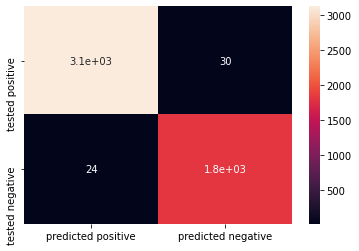

In [47]:
import seaborn as sns 
sns.heatmap(confusion, annot= True)